In [41]:
import pandas as pd
import numpy as np
%matplotlib inline

In [83]:
data_path='../raw_data/'
interdata_path='../interdata/'
model_path='../models/'

In [3]:
san_tr=pd.read_csv(data_path+'train.csv')
# san_te=pd.read_csv(data_path+'test.csv')

In [4]:
san_tr.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [42]:
len(san_tr)

4459

### Target_distribution

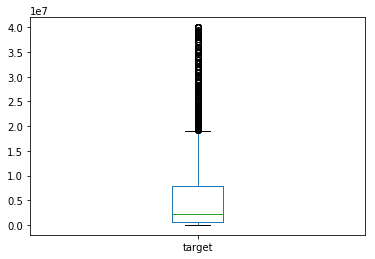

In [97]:
san_tr["target"].plot(kind="box")

### Variance Every Columns (find the zero?)

In [5]:
c_little_var=[]
for c in san_tr.columns:
    try:
        var_c=san_tr[c].var()
        if san_tr[c].var()==0:
            c_little_var.append(c)
    except:
        print("false entry :",c)
print(len(c_little_var))

false entry : ID
256


In [6]:
#eliminate the columns above

### Variance Every Rows with all zeros (find the zero?)

In [7]:
col_metric=list(set(san_tr.columns.tolist())-set(['ID','target'])-set(c_little_var))

In [ ]:
col_metr

In [8]:
i="0027d6b71"
row_var_zero=[]
for i in san_tr.ID:
    row_var=san_tr[san_tr.ID==i][col_metric].var(axis=1).values[0]

    if row_var==0:
        row_var_zero.append(i)
print(len(row_var_zero))

0


### Col with Negative 

In [9]:
col_w_neg=[]
for c in col_metric:
    if len(san_tr[san_tr[c]<0])>0:
        col_w_neg.append(c)
print(len(col_w_neg))

0


### Corr Matr

In [13]:
san_tr2=san_tr[col_metric]

In [21]:
best_corr_col=[]
CO=0
for c in col_metric:
    col_M=san_tr[[c,'target']].corr()[c]['target']
    if abs(col_M)>0.01:
        best_corr_col.append(c)
    if abs(col_M)>CO:
        CO=col_M
print(len(best_corr_col),CO)

2939 0.273379163644


In [22]:
def transform_feat(df,c,func='sqrt'):
    if func=='sqrt':
        return np.sqrt(df[c])
    elif func=='quadratic':
        return df[c]**2
    elif func=='ln':
        return np.log(df[c]+1)
    elif func=='log10':
        return np.log10(df[c]+1)
    elif func=='logistic':
        return 1/(1+np.exp(-df[c]))
    elif func=='exp':
        return np.exp(-df[c])
    else:
        return 1

In [23]:
funcs=['sqrt','quadratic','ln','log10','logistic','exp']

In [26]:
# transform_feat(san_tr2,"1c71183bb")
col_metric2=[]
corr_ups=[]
for c in col_metric:
    san_temp1=san_tr[[c,'target']]
    col_M1=san_temp1.corr()[c]['target']
    col_first=col_M1**2
    
    best_metr=c
    corr_up=0
    for ff in funcs:
        san_temp1[c+"_"+ff]=transform_feat(san_temp1,c,ff)
        col_M2=san_temp1.corr()[c+"_"+ff]['target']
        if col_M2**2>col_M1**2:
            best_metr=c+"_"+ff
            corr_up=((col_M2**2)-(col_first))/float((col_first))
            col_M1=col_M2
    col_metric2.append(best_metr)
    corr_ups.append(corr_up)
    
# print(corr_ups.mean())

C:\Users\Aska\Anaconda2\envs\snakes3_gpu\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


AttributeError: 'list' object has no attribute 'mean'

In [29]:
dTransf=pd.DataFrame({'transf':col_metric2,'corr_up':corr_ups})

In [31]:
len(dTransf[dTransf.corr_up>0])/len(dTransf)

0.7974656810982048

In [35]:
dTransf.sort_values('corr_up',ascending=False).head()

,corr_up,transf
468,3.615085e+08,3a66c353a_ln
2099,9.500204e+07,3377a30e2_logistic
385,8.473659e+06,105233ed9_ln
389,2.401733e+06,5f5cfc3c0_logistic
2453,2.009464e+06,a46587cda_logistic


In [51]:
# Transf Example (3a66c353a_ln)
san_temp2=san_tr[["5f5cfc3c0",'target']]
san_temp2["5f5cfc3c0_logistic"]=transform_feat(san_temp2,"5f5cfc3c0","logistic")
san_temp2.corr()

C:\Users\Aska\Anaconda2\envs\snakes3_gpu\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,5f5cfc3c0,target,5f5cfc3c0_logistic
5f5cfc3c0,1.000000,-0.000028,0.444427
target,-0.000028,1.000000,-0.043984
5f5cfc3c0_logistic,0.444427,-0.043984,1.000000


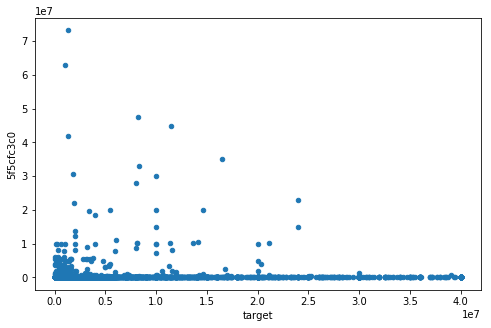

In [53]:
san_temp2.plot(kind='scatter',x='target',y='5f5cfc3c0',figsize=(8,5))

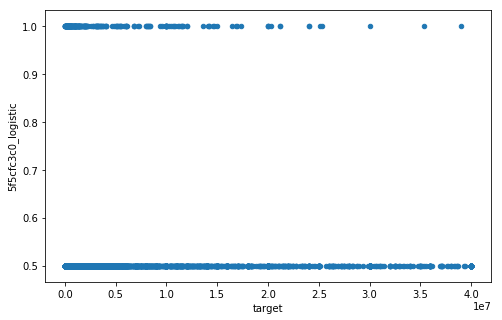

In [54]:
san_temp2.plot(kind='scatter',x='target',y='5f5cfc3c0_logistic',figsize=(8,5))

In [48]:
len(san_temp2[san_temp2["3a66c353a_ln"]<2])/len(san_temp2)

0.967705763624131

### Transform Metric

In [60]:
for c in col_metric2:
    if len(c.split('_'))>1:
        feat=c.split('_')[0]
        ff=c.split('_')[1]
        san_tr[c]=transform_feat(san_tr,feat,ff)
    else:
        print(c)
#     san_tr

1c71183bb
09a65c3a5
0b26c77a9
6804b5b03
06393096a
69cab7184
addb3f3eb
87ee785b5
2c7e41e16
e1d0e11b5
b6f5910aa
d6bca77b4
316b978cd
2954498ae
1d0aaa90f
415094079
57e185aad
a39758dae
3a89d003b
58e056e12
ad7fbe4b5
f902239b9
c30399758
5adfe7419
8d035d41e
64cabb6e7
9c502dcd9
bb0ce54e9
8a088af55
678b3f377
1bf37b3e2
8132d18b8
64e483341
a1d11c496
02861e414
645b47cde
cf488d633
62d0edc4f
bdadd6c34
a89ab46bb
4a9abd788
74d7f2dc3
ca25aad9f
e838549ac
f6eba969e
9450dfed2
fb387ea33
9c3f5714f
6760927a0
c4972742d
b2e82c050
39549da61
212efda42
44cb9b7c4
4c2064b00
5c20afdb3
e13b0c0aa
f32763afc
2288333b4
0a9735aba
6d2ece683
85816f8e3
0dc4d6c7d
849c464e7
a2d1008bb
46c525541
16b532cdc
73687e512
6654ce6d8
dda820122
aca228668
7c444370b
5c6487af1
4e21c4881
1f8a823f2
a1cd7b681
d8e8397ce
f39074b55
a765da8bc
98af380ad
f74e8f13d
402bb0761
6c27de664
4ecc3f505
ce8ce671e
e2e1aaa1e
b3abb64d2
a8b6710d0
d6033b6eb
d47c58fe2
024c577b9
22d7ad48d
a960611d7
e9235250f
bd6da0cca
6045a2949
ecd43a18b
1fe5d56b9
03a4ccd7c
85ef8a837


In [64]:
san_tr.to_csv(interdata_path+"data_train_with_transform.csv",index=False)
san_tr[col_metric2+["ID","target"]].to_csv(interdata_path+"data_train_transform_only.csv",index=False)

In [69]:
san_tr_trf=san_tr[col_metric2+["ID","target"]]

### PCA to 75% columns

In [74]:
print("from {} to {}".format(len(col_metric2),len(col_metric2)*0.75))

from 4735 to 3551.25


In [81]:
from sklearn.decomposition import PCA
import pickle

In [77]:
X_san=san_tr_trf[col_metric2].as_matrix()

In [78]:
pca_mod=PCA(n_components=3552)

In [79]:
pca_mod.fit(X_san)

PCA(copy=True, iterated_power='auto', n_components=3552, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [84]:
# save the model to disk
mod_name1= model_path+'PCA1.sav'
pickle.dump(pca_mod, open(mod_name1, 'wb'))
 
# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))

In [85]:
X_san_PCA1=pca_mod.transform(X_san)

In [87]:
X_san_PCA1.shape

(4459, 3552)

In [95]:
san_tr_trf_PCA1=pd.DataFrame(X_san_PCA1,columns=["pca_col_"+str(i) for i in range(3552)])
san_tr_trf_PCA1["ID"]=san_tr_trf["ID"]
san_tr_trf_PCA1["target"]=san_tr_trf["target"]

In [96]:
san_tr_trf_PCA1.to_csv(interdata_path+"data_train_transform_PCA1.csv",index=False)